In [42]:
# Import necessary packages and suppress warnings

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gzip
import json

from statsbombpy import sb
from mplsoccer import Pitch

warnings.filterwarnings('ignore')

In [43]:
#read in data
with open('open-data/data/competitions.json', 'r') as file:
    data = json.load(file)


In [44]:
#view data
df = pd.DataFrame(data)
df.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [45]:
sb.matches(competition_id=43, season_id=106).head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


In [46]:
MATCH_ID = 3869685

In [47]:
match_events_df = sb.events(match_id = MATCH_ID)

In [48]:
match_360_df = pd.read_json(f'/Users/lkimball/Desktop/Flatiron/Phase3_Project/open-data/data/three-sixty/{MATCH_ID}.json')

In [49]:
match_360_df.iloc[0]['freeze_frame']

[{'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [39.21695730971832, 44.77861301106889]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [39.2235613627218, 29.49684745718256]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [42.57667276588051, 67.52374056870202]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [46.549119819701936, 12.613254283667075]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [47.79830626119247, 43.13070641887103]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [55.67397005317026, 35.36721508054195]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [60.37812766957068, 75.33968683204978]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [60.521497629167975, 20.128734327624308]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [60.52478845740262, 4.81342301

In [50]:
match_events_df['id']

0       0584ee21-e3dd-4d9f-95a0-5b5e84be25c3
1       b32679f8-942e-4122-96a2-015caf75e628
2       954f6855-de22-46a2-8d09-6fe94eec2b9b
3       6404a8e8-afaf-489d-b65e-173a237ffed5
4       e84fb5b3-270f-4427-bf97-1a6eaec7285f
                        ...                 
4402    da654dbc-5e9d-4067-ab4a-2db561a77c8f
4403    0e712309-2130-4ad9-ab32-cda2e26c4d0b
4404    4f66bdf1-2c51-483a-b45a-89b525bc23c0
4405    ed616313-3980-444e-805f-9951a40d8a52
4406    ad6e8237-8cb9-44f4-b9fb-356f066f3b2b
Name: id, Length: 4407, dtype: object

In [51]:
match_360_df['event_uuid']

0       f651a6c4-55e3-4e0f-a178-59414ba83d6a
1       97b5dc82-547a-4f93-a632-a2a8daf5ac98
2       9707e590-1d55-4d25-a50f-475019356152
3       a5956ecc-d637-44d2-8705-e2079e12013e
4       5ba6dfab-49f0-4225-bbb6-8b1e27bc729a
                        ...                 
3678    97439112-dfb5-4bd5-9967-554095296096
3679    50dcde1a-faa3-4eec-a0cd-3f09a7cf763a
3680    54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91
3681    bcc6d4ae-f71c-4566-bf2d-c12f910eb526
3682    66eaf262-999f-4953-a924-f1b596de4dbf
Name: event_uuid, Length: 3683, dtype: object

In [52]:
merged_df = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')
merged_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [53]:
#viewing different actions
merged_df['type'].value_counts()

Pass               1263
Ball Receipt*      1114
Carry               940
Pressure            361
Ball Recovery       115
Duel                 98
Dribble              54
Block                50
Foul Committed       48
Clearance            45
Foul Won             44
Goal Keeper          44
Shot                 38
Miscontrol           35
Dispossessed         34
Dribbled Past        31
Interception         28
Substitution         13
Half Start           10
Half End             10
Injury Stoppage       9
50/50                 8
Tactical Shift        7
Starting XI           2
Bad Behaviour         2
Offside               1
Shield                1
Player On             1
Player Off            1
Name: type, dtype: int64

In [54]:
#new df specific to shots
shot_records_df = merged_df[merged_df['type'] == 'Shot']
shot_records_df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
4207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:04:40.798,Shot,NaN,545c2c84-018f-4570-a01c-753823feaeac,"[99.5492448455322, 74.7074998664235, 74.772720...","[{'teammate': True, 'actor': False, 'keeper': ..."
4208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:07:36.537,Shot,NaN,4ad26294-8aaf-4d69-83dd-bbf9ef797b32,"[105.370767959093, 69.7882277064759, 83.865645...","[{'teammate': False, 'actor': False, 'keeper':..."
4209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:16:15.886,Shot,NaN,6d498191-05f0-432c-8764-03aea4ef9fb8,"[104.792045881529, 72.1498267439925, 82.410662...","[{'teammate': False, 'actor': False, 'keeper':..."
4210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:22:24.114,Shot,NaN,6d527ebc-a948-4cd8-ac82-daced35bb715,"[111.070465748821, 60.325199711525, 95.8903862...","[{'teammate': False, 'actor': False, 'keeper':..."
4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,00:31:35.181,Shot,NaN,f227a92e-d86c-4f3d-aa75-5ccb71adcae6,"[97.4832338300461, 69.381332866913, 75.0504429...","[{'teammate': False, 'actor': False, 'keeper':..."


In [55]:
#dropping unwanted columns
columns_to_drop = ['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type',
       'interception_outcome', 'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pass_outcome', 'pass_outswinging', 'pass_recipient',
       'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'possession',
       'possession_team', 'possession_team_id', 'related_events', 'second',
       'substitution_outcome', 'substitution_replacement', 'tactics','under_pressure','period', 'visible_area', 'timestamp', 'type',
        'shot_key_pass_id','shot_aerial_won','position', 'out',  'team', 'player']

shot_records_df.drop(columns=columns_to_drop, inplace=True)


In [56]:
shot_records_df.columns

Index(['duration', 'id', 'index', 'location', 'match_id', 'minute',
       'play_pattern', 'player_id', 'shot_body_part', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_one_on_one',
       'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
       'event_uuid', 'freeze_frame'],
      dtype='object')

In [57]:
shot_records_df.head()

,duration,id,index,location,match_id,minute,play_pattern,player_id,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,event_uuid,freeze_frame
4207,0.948190,545c2c84-018f-4570-a01c-753823feaeac,192,"[92.4, 30.0]",3869685,4,Regular Play,27886.0,Right Foot,"[117.3, 38.3, 0.8]",NaN,"[{'location': [101.0, 48.0], 'player': {'id': ...",NaN,Saved,0.024542,Normal,Open Play,545c2c84-018f-4570-a01c-753823feaeac,"[{'teammate': True, 'actor': False, 'keeper': ..."
4208,0.422018,4ad26294-8aaf-4d69-83dd-bbf9ef797b32,340,"[99.2, 47.9]",3869685,7,Regular Play,7797.0,Right Foot,"[108.1, 40.4]",NaN,"[{'location': [88.4, 47.6], 'player': {'id': 3...",NaN,Blocked,0.062813,Normal,Open Play,4ad26294-8aaf-4d69-83dd-bbf9ef797b32,"[{'teammate': False, 'actor': False, 'keeper':..."
4209,0.872980,6d498191-05f0-432c-8764-03aea4ef9fb8,602,"[103.1, 34.6]",3869685,16,Regular Play,2995.0,Right Foot,"[120.0, 39.6, 7.5]",True,"[{'location': [117.8, 39.5], 'player': {'id': ...",NaN,Off T,0.106801,Normal,Open Play,6d498191-05f0-432c-8764-03aea4ef9fb8,"[{'teammate': False, 'actor': False, 'keeper':..."
4210,0.625635,6d527ebc-a948-4cd8-ac82-daced35bb715,771,"[108.0, 40.0]",3869685,22,Other,5503.0,Left Foot,"[120.0, 41.8, 0.2]",NaN,NaN,NaN,Goal,0.783500,Normal,Penalty,6d527ebc-a948-4cd8-ac82-daced35bb715,"[{'teammate': False, 'actor': False, 'keeper':..."
4211,3.284765,f227a92e-d86c-4f3d-aa75-5ccb71adcae6,979,"[94.3, 23.5]",3869685,31,Regular Play,27886.0,Right Foot,"[112.3, 80.0]",True,"[{'location': [117.9, 39.0], 'player': {'id': ...",NaN,Wayward,0.010578,Half Volley,Open Play,f227a92e-d86c-4f3d-aa75-5ccb71adcae6,"[{'teammate': False, 'actor': False, 'keeper':..."


In [58]:
#changing shot_location to 2 seperate columns
shot_records_df[['x_start', 'y_start']] = pd.DataFrame(shot_records_df.location.tolist(), index=shot_records_df.index)

In [63]:
#changing shot_end_location to 3 seperate columns
shot_records_df[['x_end', 'y_end', 'c_end']] = pd.DataFrame(shot_records_df.shot_end_location.tolist(), index=shot_records_df.index)

In [65]:
shot_records_df.columns

Index(['duration', 'id', 'index', 'location', 'match_id', 'minute',
       'play_pattern', 'player_id', 'shot_body_part', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_one_on_one',
       'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
       'event_uuid', 'freeze_frame', 'x_start', 'y_start', 'x_end', 'y_end',
       'c_end'],
      dtype='object')

In [75]:
shot_records_df['shot_outcome']

4207      Saved
4208    Blocked
4209      Off T
4210       Goal
4211    Wayward
4212       Goal
4213      Saved
4214      Saved
4215      Off T
4216      Off T
4217      Off T
4218      Saved
4219       Goal
4220       Goal
4221    Blocked
4222    Blocked
4223      Saved
4224      Saved
4225      Off T
4226    Blocked
4227    Blocked
4228    Blocked
4229      Off T
4230      Saved
4231      Saved
4232       Goal
4233    Blocked
4234       Goal
4235      Saved
4236      Off T
4237       Goal
4238       Goal
4239      Saved
4240       Goal
4241      Off T
4242       Goal
4243       Goal
4244       Goal
Name: shot_outcome, dtype: object

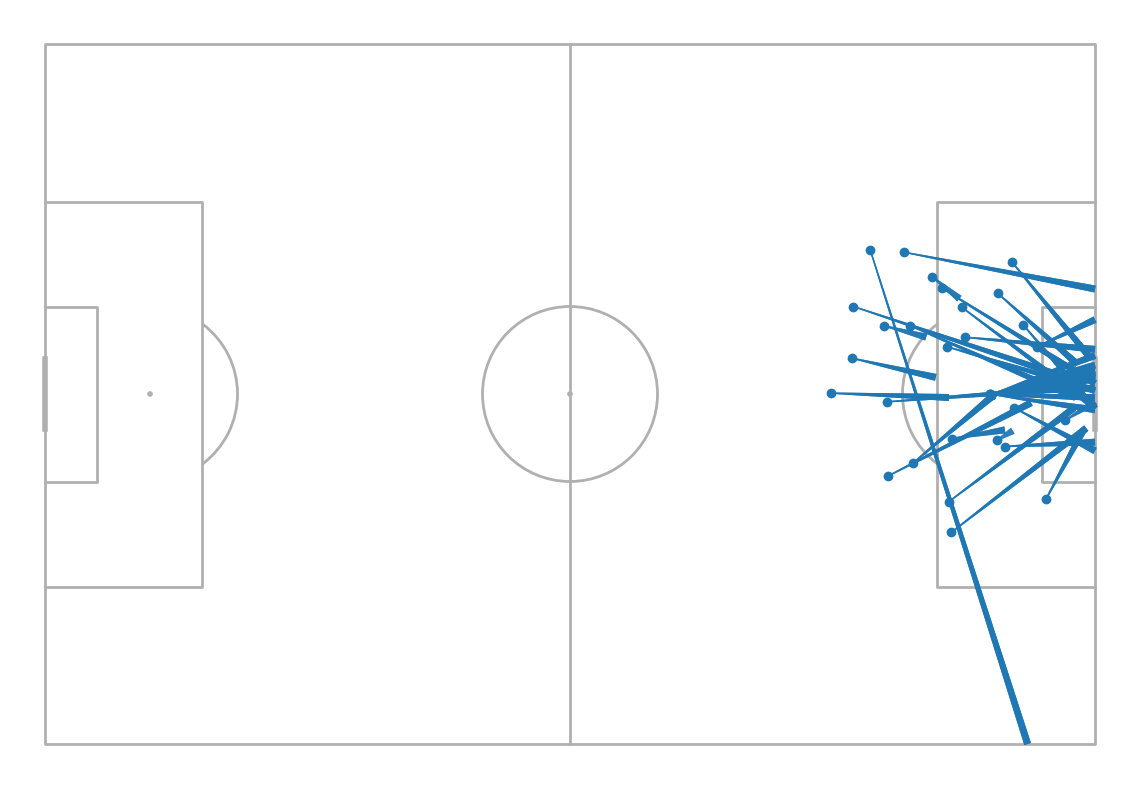

In [69]:
p = Pitch(pitch_type= 'statsbomb')
fig, ax = p.draw(figsize=(12,8))

p.scatter(x=shot_records_df['x_start'], y=shot_records_df['y_start'], ax=ax)
p.lines(xstart=shot_records_df['x_start'], ystart=shot_records_df['y_start'], xend= shot_records_df['x_end'], yend= shot_records_df['y_end'],ax=ax, comet=True)

for x in shot_records_df

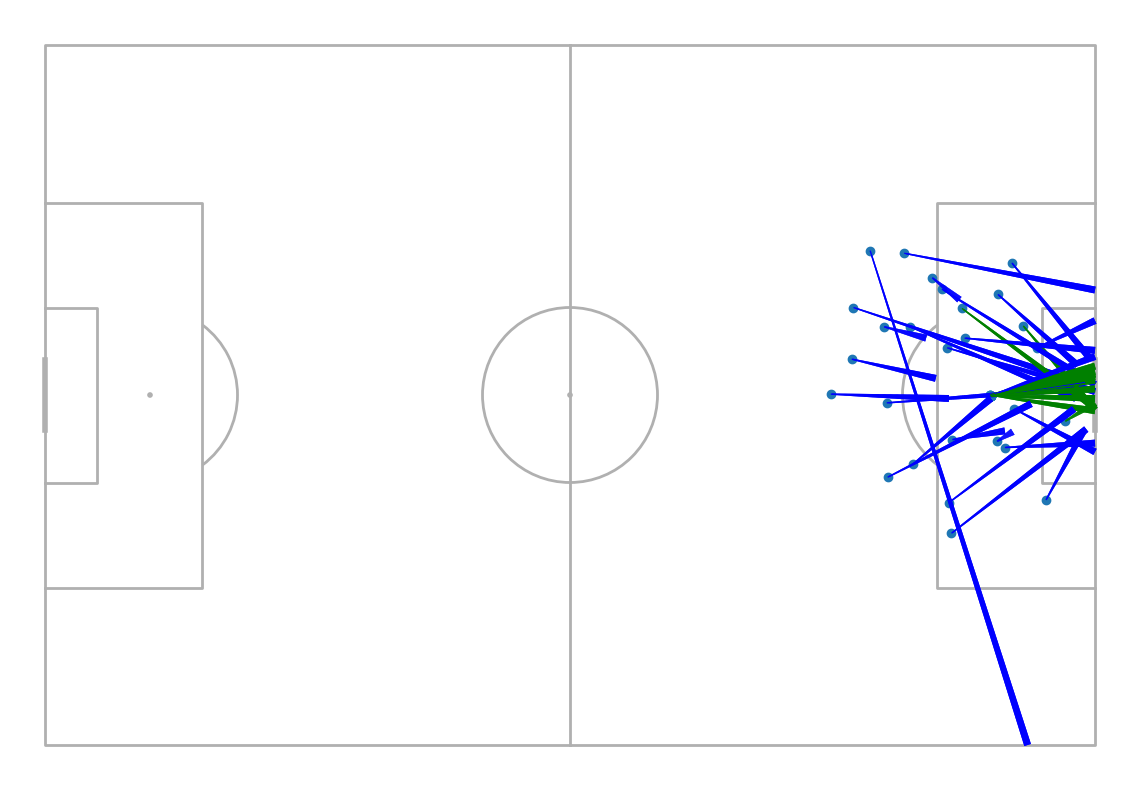

In [76]:


# Assuming shot_records_df is the DataFrame with 'type' as 'Shot'

# Create a Pitch object
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

# Plot shots on the pitch using scatter
p.scatter(x=shot_records_df['x_start'], y=shot_records_df['y_start'], ax=ax)

# Plot shot lines with a different color for goals
for _, row in shot_records_df.iterrows():
    x_start = row['x_start']
    y_start = row['y_start']
    x_end = row['x_end']
    y_end = row['y_end']
    outcome = row['shot_outcome']

    # Determine color based on shot outcome
    color = 'green' if outcome == 'Goal' else 'blue'

    # Plot the shot lines
    p.lines(xstart=x_start, ystart=y_start, xend=x_end, yend=y_end, ax=ax, color=color, comet=True)

# Show the plot
plt.show()
